<a href="https://colab.research.google.com/github/Manasi758/TCS-iON-Rio-125-Forecasting-System/blob/main/Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings('ignore')


sales=pd.read_csv("/content/train.csv")
sales.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
sales.shape

(9800, 18)

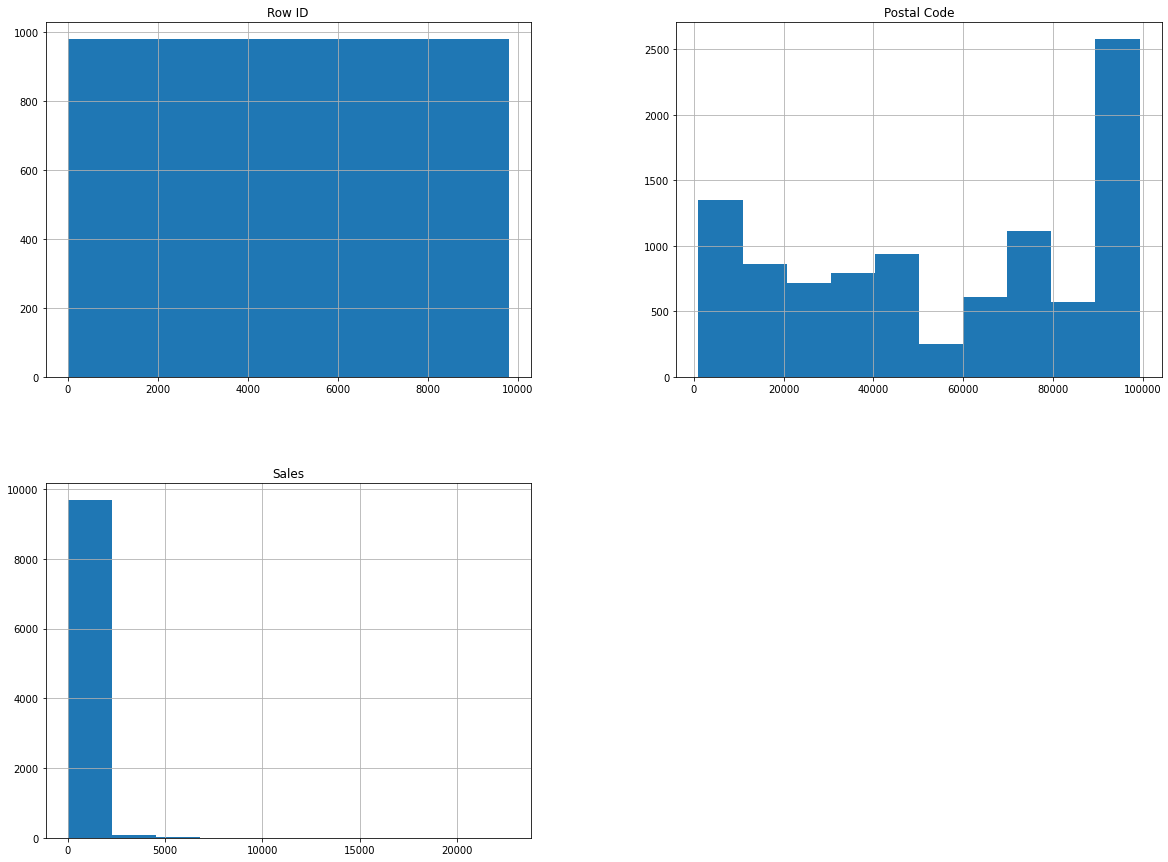

In [ ]:
sales.hist(figsize=(20,15))
plt.show()

In [ ]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
sales.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,0.001151
Postal Code,0.013645,1.000000,-0.024067
Sales,0.001151,-0.024067,1.000000


In [ ]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
sales.dropna(inplace=True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
sales.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
sales.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [ ]:
# Extract the data of Office Supplies
office_supplies = sales.loc[sales['Category'] == 'Office Supplies']


office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [ ]:
##Data preprocessing##

office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,2017-12-06,14.620
4,2016-11-10,22.368
6,2015-09-06,7.280
8,2015-09-06,18.504
9,2015-09-06,114.900


In [ ]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2015-01-03,303.216
1,2015-01-04,119.888
2,2015-01-06,2282.530
3,2015-01-07,25.104
4,2015-01-08,184.200


In [ ]:
##Indexing with the time series data##
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
2015-01-03,303.216
2015-01-04,119.888
2015-01-06,2282.530
2015-01-07,25.104
2015-01-08,184.200


In [ ]:
office_supplies.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1143, freq=None)

In [ ]:
monthly = office_supplies['Sales'].resample('MS').mean()
monthly

Order Date
2015-01-01     442.918737
2015-02-01     218.343909
2015-03-01     302.427250
2015-04-01     352.387750
2015-05-01     698.627304
2015-06-01     504.030905
2015-07-01     725.808818
2015-08-01     439.934474
2015-09-01     988.528962
2015-10-01     339.506087
2015-11-01     899.779800
2015-12-01     591.031478
2016-01-01     222.152933
2016-02-01     324.928500
2016-03-01     653.024217
2016-04-01     526.138250
2016-05-01     419.191462
2016-06-01     563.081579
2016-07-01     282.943227
2016-08-01     524.227136
2016-09-01     635.736885
2016-10-01     493.848375
2016-11-01     757.300760
2016-12-01     356.563333
2017-01-01     814.272800
2017-02-01     440.148450
2017-03-01     835.973040
2017-04-01     400.754680
2017-05-01     585.299321
2017-06-01     432.782440
2017-07-01     539.620609
2017-08-01     451.287640
2017-09-01     559.121958
2017-10-01     877.068000
2017-11-01     586.027154
2017-12-01    1026.205538
2018-01-01     853.153520
2018-02-01     659.403136
2

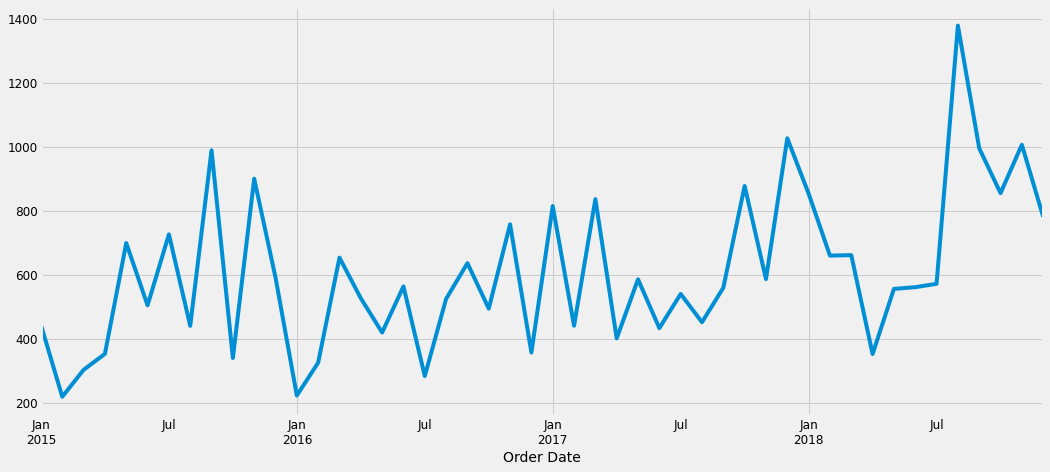

In [ ]:
##Visualizing the Sales Time Series Data##
monthly.plot(figsize = (16, 7))
plt.show()


The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

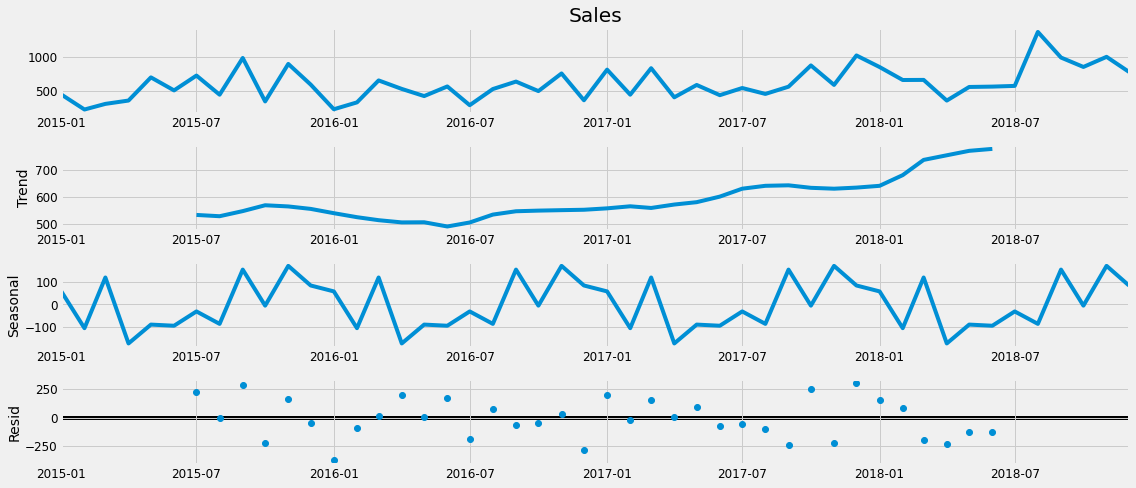

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

This fig shows clear seasonality in our data

**Time Series Forecasting with ARIMA**

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:744.9374231679759
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1191.0721500534967
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:501.3497718660246
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:331.21109493161623
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:517.094204505464
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1372.8165879722153
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.739509498382
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:332.25115623004723
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:705.3863369545277
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2711.5910307279055
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:489.89647172929494
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.2086051325588
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:518.8650531334388
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2667.535081339526
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:348.9629654896911
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.2919030924741
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:659.99279584349
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1455.69830657503
ARIMA(0, 

Fitting the ARIMA Model using the Optimal parameters

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.244     -0.007      0.994      -0.481       0.477
ma.L1         -1.0000      0.277     -3.616      0.000      -1.542      -0.458
ar.S.L12      -0.3191      0.318     -1.003      0.316      -0.943       0.304
sigma2      7.434e+04   3.72e-06      2e+10      0.000    7.43e+04    7.43e+04


Validating Forecasts


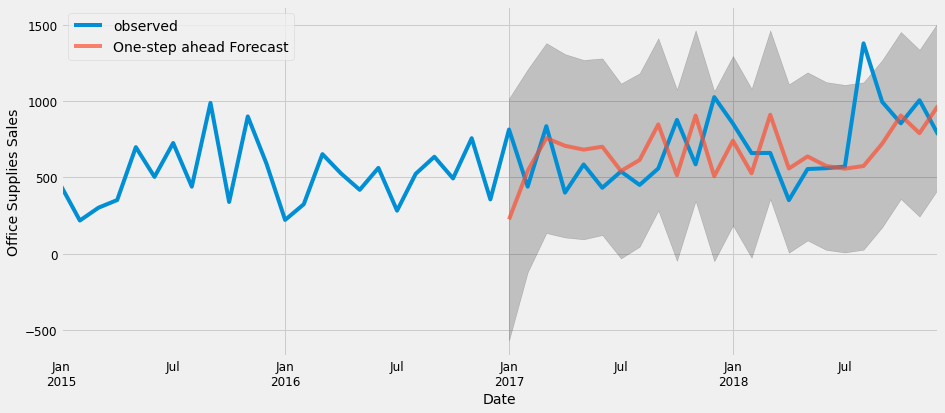

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

The grey area shows the confidence interval.

In [ ]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 87415.69
The Root Mean Squared Error of our forecasts is 295.66


The Root Mean Squared Error (RMSE) shows that our model was able to predict the average daily Office Supplies Sales in the test set within 295.66 of the real sales. Our Office Supplies daily sales range from around 50 to 1350. So, our model works pretty well so far.

Producting and Visualizing Forecasts

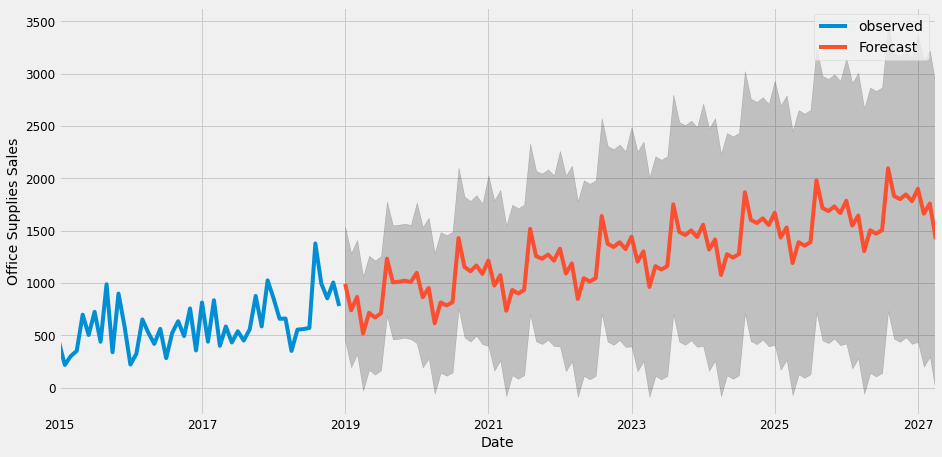

In [ ]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()